<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/multi_dimensional/notebook/Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

In [16]:
!git clone https://github.com/simonemallei/complex-systems-social-graph.git

fatal: destination path 'complex-systems-social-graph' already exists and is not an empty directory.


Printing the files' names in its "recommender_social_graph" directory:

In [17]:
import sys
print(sys.path)

['c:\\Users\\fabio\\Desktop\\complex-systems-social-graph\\recommender_social_graph\\multi_dimensional\\notebook', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310', '', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin', '.', '../../']


Importing mandatory methods

In [18]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
sys.path.append('.')
sys.path.append('../../')
%reload_ext autoreload
%autoreload 2
from multi_dimensional.graph_creation import create_graph
from multi_dimensional.test import print_graph
from multi_dimensional.abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from multi_dimensional.metrics import polarisation, sarle_bimodality, disagreement, feed_entropy
from multi_dimensional.content.content_recommender import simulate_epoch_content_recommender


Creation of a Graph with $50$ nodes, $3$ opinions

In [19]:
nodes, ops = 50, 3
G = create_graph(nodes, ops, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G, ops, n_post=3)

Printing the graph

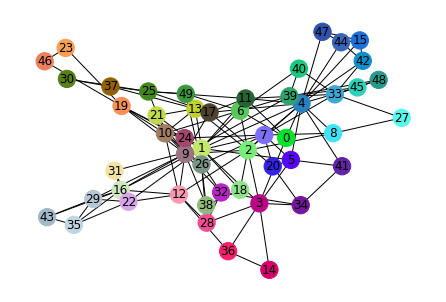

In [20]:
print_graph(G, False)

Simulating 100 epochs with different content reccomenders (and without it)


In [21]:
starting_G = G.copy()
random_G = G.copy()
normal_G = G.copy()
nudge_G = G.copy()
nudge_var_G = G.copy()
similar_G = G.copy()
unsimilar_G = G.copy()
random_param = {'n_post': 2}
normal_param = {'normal_mean': 0.5, 'normal_std': 0.1, 'n_post': 2}
nudge_param = {'nudge_goal': np.array([0.5, 0.5, 0.5]), 'n_post': 2}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.2}

for i in range(150):
  G = simulate_epoch_updated(G, ops, 50, 50)
  random_G = simulate_epoch_content_recommender(random_G, ops, 50, 50,
                                                strat_param=random_param)
  normal_G = simulate_epoch_content_recommender(normal_G, ops, 50, 50, 
                                               strategy="normal", 
                                               strat_param=normal_param)
  nudge_G = simulate_epoch_content_recommender(nudge_G, ops, 50, 50,
                                               strategy="nudge",
                                               strat_param=nudge_param)

  nudge_opt_G = simulate_epoch_content_recommender(nudge_var_G, ops, 50, 50,
                                               strategy="nudge_opt",
                                               strat_param=nudge_param)
  similar_G = simulate_epoch_content_recommender(similar_G, ops, 50, 50, 
                                                 strategy="similar", 
                                                 strat_param=similar_param)
  unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, ops, 50, 50, 
                                                   strategy="unsimilar",
                                                   strat_param=unsimilar_param)

Printing graphs

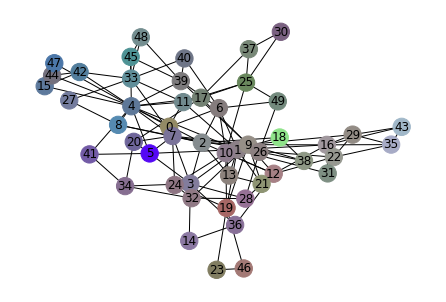

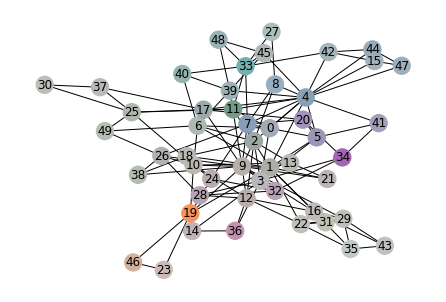

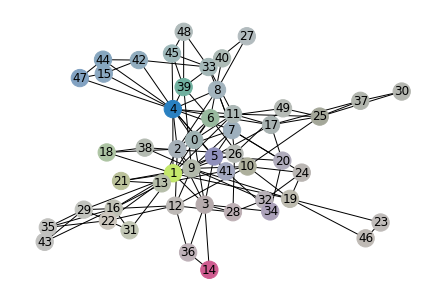

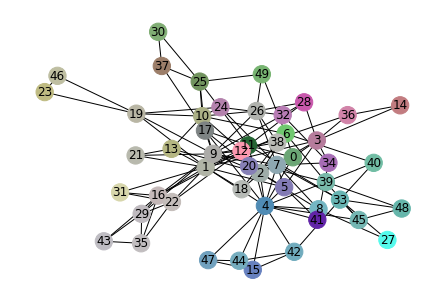

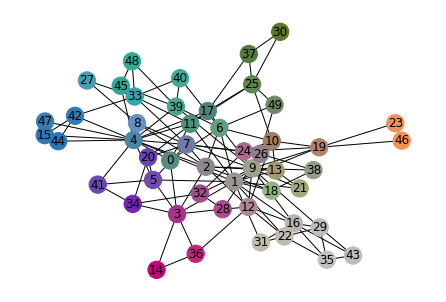

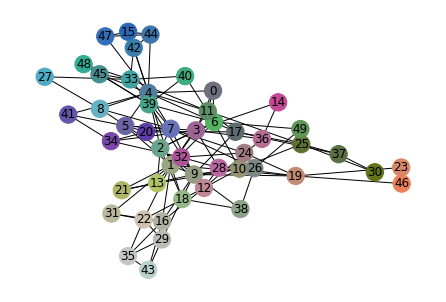

In [22]:
print_graph(random_G, False)
print_graph(normal_G, False)
print_graph(nudge_G, False)
print_graph(nudge_opt_G, False)
print_graph(similar_G, False)
print_graph(unsimilar_G, False)

Polarisation


In [23]:
print(polarisation(random_G))
print(polarisation(normal_G))
print(polarisation(nudge_G))
print(polarisation(nudge_opt_G))
print(polarisation(similar_G))
print(polarisation(unsimilar_G))

36.57010557060822
2.896015896211975
3.502694323542196
17.08838894842389
38.64291697344116
38.55757008790448


Disagreement


In [24]:
print(sum(disagreement(random_G).values()))
print(sum(disagreement(normal_G).values()))
print(sum(disagreement(nudge_G).values()))
print(sum(disagreement(nudge_opt_G).values()))
print(sum(disagreement(similar_G).values()))
print(sum(disagreement(unsimilar_G).values()))

22.646644536404796
18.52510898572903
24.774988747984192
29.121637574471706
25.820686718013196
27.33750597715054


Sarle bimodality

In [25]:
print(sarle_bimodality(random_G, ops))
print(sarle_bimodality(normal_G, ops))
print(sarle_bimodality(nudge_G, ops))
print(sarle_bimodality(nudge_opt_G, ops))
print(sarle_bimodality(similar_G, ops))
print(sarle_bimodality(unsimilar_G, ops))

[-1.9367281048024885, 0.17576586992918308, 0.754239394966126]
[0.5919315200512385, 0.8261955820766398, 0.8670626695818127]
[0.8086854831543222, 0.5697959721758208, 0.8980576713948033]
[-2.075675961197225, 1.0368674351677531, 1.3798992825152938]
[-0.9740097342620193, 3.672186939437448, 5.222033491934867]
[-0.8317110159344523, -1.129178264731824, 2.9034927027611075]


Feed Entropy

In [30]:
print(sum(feed_entropy(random_G, ops).values()) / nodes)
print(sum(feed_entropy(normal_G, ops).values()) / nodes)
print(sum(feed_entropy(nudge_G, ops).values()) / nodes)
print(sum(feed_entropy(nudge_opt_G, ops).values()) / nodes)
print(sum(feed_entropy(similar_G, ops).values()) / nodes)
print(sum(feed_entropy(unsimilar_G, ops).values()) / nodes)

0.568783431840483
0.39213332336861045
0.3912970491540979
0.4215874930807722
0.2484779687509779
nan
